# Engine Load versus Fuel Usage Analysis for Concert IoT Data

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import math

from bokeh.charts import Histogram, show
from bokeh.plotting import output_notebook
output_notebook()

from bokeh.layouts import column
from bokeh.plotting import figure

Loading BokehJS ...

### Read in 3-month concert IoT data

In [4]:
df = pd.read_csv('concert_3month_data.csv', header=0)
df.head()

,DateTime,Coolant Temp,DateTime.1,Engine Load,DateTime.2,Fuel Pressure,DateTime.3,Fuel Usage,DateTime.4,Oil Pressure,...,DateTime.10,Engine Speed,DateTime.11,Air Intake Temp,DateTime.12,Total Fuel Used,DateTime.13,Engine Hours,DateTime.14,Last Error
0,2/7/2017 12:26,19.0,2/7/2017 12:26,0.0,2/7/2017 12:26,0.0,2/7/2017 12:26,0.0,2/7/2017 12:26,0.0,...,2/7/2017 12:26,0.0,2/7/2017 12:26,17.0,2/7/2017 12:31,21492.0,2/7/2017 12:32,1057.0,2/7/2017 12:26,516.0
1,2/7/2017 12:27,18.0,2/7/2017 12:27,0.0,2/7/2017 12:27,0.0,2/7/2017 12:27,0.0,2/7/2017 12:27,0.0,...,2/7/2017 12:27,0.0,2/7/2017 12:27,18.0,2/7/2017 12:32,21492.0,2/7/2017 12:34,1057.0,2/7/2017 12:44,516.0
2,2/7/2017 12:28,18.0,2/7/2017 12:28,0.0,2/7/2017 12:28,0.0,2/7/2017 12:28,0.0,2/7/2017 12:28,0.0,...,2/7/2017 12:28,0.0,2/7/2017 12:28,18.0,2/7/2017 12:34,21492.0,2/7/2017 12:35,1057.0,2/7/2017 12:51,516.0
3,2/7/2017 12:29,18.0,2/7/2017 12:29,0.0,2/7/2017 12:29,0.0,2/7/2017 12:29,0.0,2/7/2017 12:29,0.0,...,2/7/2017 12:29,0.0,2/7/2017 12:29,18.0,2/7/2017 12:35,21492.0,2/7/2017 12:36,1057.0,2/7/2017 13:51,516.0
4,2/7/2017 12:30,18.0,2/7/2017 12:30,0.0,2/7/2017 12:30,0.0,2/7/2017 12:30,0.0,2/7/2017 12:30,0.0,...,2/7/2017 12:30,0.0,2/7/2017 12:30,18.0,2/7/2017 12:36,21492.0,2/7/2017 12:38,1057.0,2/8/2017 8:55,516.0


### Read in the Engine Load data and format the date and time

In [5]:
el_df = df[[2,3]].copy()
el_df['DateTime.1'] = pd.to_datetime(el_df['DateTime.1'])
el_df.columns = ['DateTime', 'EngineLoad']
el_df.head()

,DateTime,EngineLoad
0,2017-02-07 12:26:00,0.0
1,2017-02-07 12:27:00,0.0
2,2017-02-07 12:28:00,0.0
3,2017-02-07 12:29:00,0.0
4,2017-02-07 12:30:00,0.0


### Read in the Fuel Usage data and format the date and time

In [6]:
fu_df = df[[6,7]].copy()
fu_df['DateTime.3'] = pd.to_datetime(fu_df['DateTime.3'])
fu_df.columns = ['DateTime', 'FuelUsage']
fu_df.head()

,DateTime,FuelUsage
0,2017-02-07 12:26:00,0.0
1,2017-02-07 12:27:00,0.0
2,2017-02-07 12:28:00,0.0
3,2017-02-07 12:29:00,0.0
4,2017-02-07 12:30:00,0.0


### Histogram of Engine Load Values

In [7]:
el_df.dropna(axis=0, inplace=True)
p = Histogram(el_df, values='EngineLoad', title= "Histogram of Engine Load Values", color='lightgreen')
show(p)

### Histogram of Fuel Usage Values

In [8]:
fu_df.dropna(axis=0, inplace=True)
p = Histogram(fu_df, values='FuelUsage', title= "Histogram of Fuel Usage Values", color='dodgerblue')
show(p)

### Merge the Engine Load and Fuel Usage values for matching timestamps

In [9]:
merged_df = pd.merge(el_df, fu_df, on='DateTime', how='inner')
merged_df.head()

,DateTime,EngineLoad,FuelUsage
0,2017-02-07 12:26:00,0.0,0.0
1,2017-02-07 12:27:00,0.0,0.0
2,2017-02-07 12:28:00,0.0,0.0
3,2017-02-07 12:29:00,0.0,0.0
4,2017-02-07 12:30:00,0.0,0.0


### Round the Fuel Usage values into buckets of 10 and drop all 0 values

In [10]:
merged_df['FuelUsageRounded'] = merged_df['FuelUsage'].apply(lambda x: int(math.ceil(x / 10.0)) * 10)

In [11]:
def drop_all_zeroes(target_df, key1, key2):
    mask = (target_df[key1] != 0) & (target_df[key2] != 0)
    return mask

merged_df = merged_df.loc[drop_all_zeroes(merged_df, 'EngineLoad', 'FuelUsage')]
merged_df.head()
# print(merged_df.count)

,DateTime,EngineLoad,FuelUsage,FuelUsageRounded
6,2017-02-07 12:35:00,11.0,5.55,10
12,2017-02-07 12:45:00,19.0,7.45,10
18,2017-02-07 13:51:00,15.0,5.80,10
19,2017-02-07 14:19:00,11.0,5.45,10
20,2017-02-07 14:20:00,12.0,4.50,10


### Histogram of Engine Load Values for different values of Fuel Usage

In [12]:
p1 = Histogram(merged_df, values='EngineLoad', 
               title= "Histogram of Engine Load Values for different Fuel Usage", 
               color='FuelUsageRounded', 
               palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
p1.legend.location='top_right'
show(p1)

### Linear Regression model between Engine Load and Fuel Usage

(1000, 1) (1000, 1)


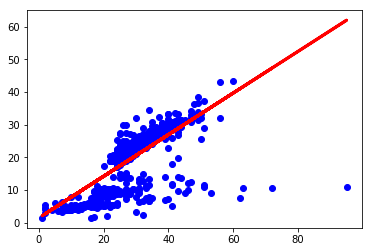

In [13]:
from sklearn import linear_model
import numpy as np

X = np.matrix(merged_df.head(1000)['EngineLoad'].values).T
y = np.matrix(merged_df.head(1000)['FuelUsage'].values).T
print(X.shape, y.shape)

regr = linear_model.LinearRegression()
regr.fit(X, y)
        
plt.scatter(X, y, color='blue')
plt.plot(X, regr.predict(X), color='red', linewidth=3)

plt.show()

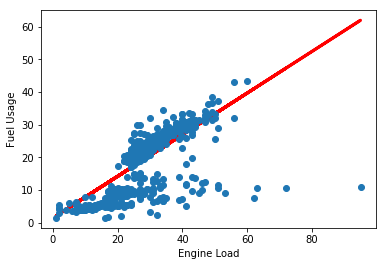

In [14]:
from scipy import stats

X = merged_df.head(1000)['EngineLoad']
y = merged_df.head(1000)['FuelUsage']

slope, intercept, i, j, k = stats.linregress(X, y)

line = slope*X + intercept
plt.plot(X, line, '-r', X, y, 'o', linewidth=3)
plt.xlabel('Engine Load')
plt.ylabel('Fuel Usage')
plt.show()

### Polynomial (degree 2 and 3) Regression model between Engine Load and Fuel Usage

          2
-0.01412 x + 1.49 x - 10.05
            3            2
-4.508e-05 x - 0.008841 x + 1.32 x - 8.536


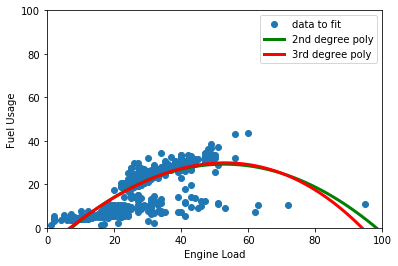

In [15]:
from numpy import *

z2 = polyfit(X.values, y, 2) 
p2 = poly1d(z2) # construct the polynomial 
print(poly1d(z2))

z3 = polyfit(X.values, y, 3)
p3 = poly1d(z3)
print(poly1d(z3))

xx = linspace(0, 100, 100)
plt.plot(X, y, 'o', xx, p2(xx),'-g', xx, p3(xx),'-r', linewidth=3)
plt.legend(['data to fit', '2nd degree poly', '3rd degree poly'])
plt.axis([0,100,0,100])
plt.xlabel('Engine Load')
plt.ylabel('Fuel Usage')
plt.show()

## Train a neural network to learn the Engine Load-Fuel Usage correlation

In [16]:
import tensorflow as tf

In [17]:
x = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([1, 25]))
b = tf.Variable(tf.zeros([25]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 1])
mean_square_error = tf.reduce_mean(tf.squared_difference(y_, y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(mean_square_error)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
i = 0
for _ in range(120):
    batch_xs = np.matrix(merged_df.iloc[i:i+100]['EngineLoad'].values).T
    batch_ys = np.matrix(merged_df.iloc[i:i+100]['FuelUsage'].values).T
    i = i+100
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})